<a href="https://colab.research.google.com/github/DSAishwaryaG/Claim_Prediction/blob/main/Property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.preprocessing import power_transform


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Project_Datasets/Property_Claims.csv",nrows=10000)

In [ ]:
df.describe()

,SOURCE,LOSS_ID,COMMNO,PROPLOCATR,ZIPCODE,ZipClean,PROP_VALUE,BUILDING,CONTENTS,PROPLOSSES,PAID,AVERAGE,BuildPay,ContPay,DamagePCT,SubDam
count,10000.00000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,9999.000000,9999.000000,10000.000000,10000.000000
mean,2016.68900,5000.50000,328481.756200,1697.423900,4.012093e+08,54621.191200,1.688966e+07,1.839926e+05,7.436873e+04,9.636400,2.583614e+05,27809.995877,20187.162194,7780.660053,0.165162,0.027800
std,1.48812,2886.89568,119933.112475,937.440925,3.290272e+08,26046.510448,1.277427e+08,2.232294e+05,1.608232e+05,5.569874,3.142564e+05,29368.249145,37270.333701,24661.377300,0.498801,0.164408
min,2015.00000,1.00000,10045.000000,2.000000,1.908000e+03,731.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,6.530290e+03,2158.560000,0.000000,0.000000,0.000000,0.000000
25%,2015.00000,2500.75000,225203.000000,837.000000,7.753500e+04,33708.000000,7.081900e+04,7.228305e+04,1.368013e+04,6.000000,9.623565e+04,11979.602500,3885.530000,0.000000,0.020734,0.000000
50%,2018.00000,5000.50000,290808.000000,1653.500000,4.107412e+08,70065.000000,1.350300e+05,1.232002e+05,3.320000e+04,8.000000,1.649158e+05,19094.785000,9075.870000,1829.270000,0.065116,0.000000
75%,2018.00000,7500.25000,480287.000000,2538.000000,7.080282e+08,77028.000000,2.523500e+05,2.110328e+05,6.878483e+04,12.000000,2.915301e+05,32594.860000,20909.435000,6909.235000,0.181959,0.000000
max,2018.00000,10000.00000,720101.000000,3331.000000,9.854195e+08,98541.000000,1.000000e+09,2.002471e+06,1.780523e+06,36.000000,3.782994e+06,378299.420000,771800.000000,759972.400000,28.900000,1.000000


In [ ]:
df.head(5)

,SOURCE,LOSS_ID,STATENAME,COMMNAME,COMMNO,PROPLOCATR,LASTLOSS,CITY,STATE,ZIPCODE,ZipClean,OCCUPANCY,POST_FIRM,ZONE,Floodplain,PROP_VALUE,BUILDING,CONTENTS,PROPLOSSES,PAID,AVERAGE,AS_OF_DT,DTLOSS01,LossDateClean,BuildPay,ContPay,DamagePCT,Valid_Value,SubDam,County Name
0,2018,1,TEXAS,"SAN ANTONIO, CITY OF",480045,2,False,SAN ANTONIO,TX,782162023,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,04/04/1991,04-04-1991,NaN,NaN,0.000000,True,0,BEXAR COUNTY
1,2018,2,TEXAS,"SAN ANTONIO, CITY OF",480045,2,False,SAN ANTONIO,TX,782162023,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,05/05/1993,05-05-1993,47806.35,26351.50,0.068674,True,0,BEXAR COUNTY
2,2018,3,TEXAS,"SAN ANTONIO, CITY OF",480045,2,False,SAN ANTONIO,TX,782162023,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,10/17/1998,17-10-1998,53425.24,40092.22,0.076745,True,0,BEXAR COUNTY
3,2018,4,TEXAS,"SAN ANTONIO, CITY OF",480045,2,True,SAN ANTONIO,TX,782162023,78216,SINGLE FMLY,N,X,False,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,07/01/2002,01-07-2002,38355.19,3569.51,0.055097,True,0,BEXAR COUNTY
4,2018,5,RHODE ISLAND,"SOUTH KINGSTOWN, TOWN OF",445407,4,False,SOUTH KINGSTON,RI,2879,2879,SINGLE FMLY,N,VE,True,80442,100785.43,0.00,5,100785.43,20157.09,01/31/2018,08/19/1991,19-08-1991,11808.00,0.00,0.146789,True,0,WASHINGTON COUNTY


In [ ]:
pd.isnull(df).values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SOURCE         10000 non-null  int64  
 1   LOSS_ID        10000 non-null  int64  
 2   STATENAME      10000 non-null  object 
 3   COMMNAME       10000 non-null  object 
 4   COMMNO         10000 non-null  int64  
 5   PROPLOCATR     10000 non-null  int64  
 6   LASTLOSS       10000 non-null  bool   
 7   CITY           10000 non-null  object 
 8   STATE          10000 non-null  object 
 9   ZIPCODE        10000 non-null  int64  
 10  ZipClean       10000 non-null  int64  
 11  OCCUPANCY      10000 non-null  object 
 12  POST_FIRM      10000 non-null  object 
 13  ZONE           10000 non-null  object 
 14  Floodplain     10000 non-null  bool   
 15  PROP_VALUE     10000 non-null  int64  
 16  BUILDING       10000 non-null  float64
 17  CONTENTS       10000 non-null  float64
 18  PROPLOS

In [ ]:
df.isnull().sum()

SOURCE              0
LOSS_ID             0
STATENAME           0
COMMNAME            0
COMMNO              0
PROPLOCATR          0
LASTLOSS            0
CITY                0
STATE               0
ZIPCODE             0
ZipClean            0
OCCUPANCY           0
POST_FIRM           0
ZONE                0
Floodplain          0
PROP_VALUE          0
BUILDING            0
CONTENTS            0
PROPLOSSES          0
PAID                0
AVERAGE             0
AS_OF_DT            0
DTLOSS01            0
LossDateClean       0
BuildPay            1
ContPay             1
DamagePCT           0
Valid_Value         0
SubDam              0
County Name      4370
dtype: int64

In [ ]:
df2 = df.drop(['County Name'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SOURCE         10000 non-null  int64  
 1   LOSS_ID        10000 non-null  int64  
 2   STATENAME      10000 non-null  object 
 3   COMMNAME       10000 non-null  object 
 4   COMMNO         10000 non-null  int64  
 5   PROPLOCATR     10000 non-null  int64  
 6   LASTLOSS       10000 non-null  bool   
 7   CITY           10000 non-null  object 
 8   STATE          10000 non-null  object 
 9   ZIPCODE        10000 non-null  int64  
 10  ZipClean       10000 non-null  int64  
 11  OCCUPANCY      10000 non-null  object 
 12  POST_FIRM      10000 non-null  object 
 13  ZONE           10000 non-null  object 
 14  Floodplain     10000 non-null  bool   
 15  PROP_VALUE     10000 non-null  int64  
 16  BUILDING       10000 non-null  float64
 17  CONTENTS       10000 non-null  float64
 18  PROPLOS

In [ ]:
df2 = df2.drop(['SOURCE','LOSS_ID','COMMNAME','PROPLOCATR','STATE'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATENAME      10000 non-null  object 
 1   COMMNO         10000 non-null  int64  
 2   LASTLOSS       10000 non-null  bool   
 3   CITY           10000 non-null  object 
 4   ZIPCODE        10000 non-null  int64  
 5   ZipClean       10000 non-null  int64  
 6   OCCUPANCY      10000 non-null  object 
 7   POST_FIRM      10000 non-null  object 
 8   ZONE           10000 non-null  object 
 9   Floodplain     10000 non-null  bool   
 10  PROP_VALUE     10000 non-null  int64  
 11  BUILDING       10000 non-null  float64
 12  CONTENTS       10000 non-null  float64
 13  PROPLOSSES     10000 non-null  int64  
 14  PAID           10000 non-null  float64
 15  AVERAGE        10000 non-null  float64
 16  AS_OF_DT       10000 non-null  object 
 17  DTLOSS01       10000 non-null  object 
 18  LossDat

In [ ]:
#df2 = df2.drop(['County Name'], axis=1)

In [ ]:
df2.corr()

,COMMNO,LASTLOSS,ZIPCODE,ZipClean,Floodplain,PROP_VALUE,BUILDING,CONTENTS,PROPLOSSES,PAID,AVERAGE,BuildPay,ContPay,DamagePCT,Valid_Value,SubDam
COMMNO,1.000000,-0.008758,0.186557,0.170254,-0.251016,-0.000715,0.144800,0.107178,0.049285,0.157707,0.120559,0.064834,0.049499,0.030580,-0.024908,-0.009637
LASTLOSS,-0.008758,1.000000,-0.042030,-0.029532,0.031197,-0.021905,-0.063110,-0.042141,-0.162101,-0.066396,0.017687,0.272432,0.087825,0.153404,-0.202375,-0.067061
ZIPCODE,0.186557,-0.042030,1.000000,0.584425,-0.179053,-0.033227,0.139970,0.073475,0.152684,0.137028,0.046229,0.018197,0.032279,-0.011974,-0.009728,-0.023763
ZipClean,0.170254,-0.029532,0.584425,1.000000,-0.259500,-0.019323,0.072362,0.049531,0.145264,0.076749,-0.018233,-0.027065,0.023250,0.050903,-0.021727,0.047357
Floodplain,-0.251016,0.031197,-0.179053,-0.259500,1.000000,0.009125,-0.128676,-0.116316,-0.110231,-0.150930,-0.064851,-0.007509,-0.038967,0.008403,-0.000646,0.098541
PROP_VALUE,-0.000715,-0.021905,-0.033227,-0.019323,0.009125,1.000000,0.110593,0.129756,0.053454,0.144962,0.108129,0.023850,0.066317,-0.043482,0.010587,-0.022279
BUILDING,0.144800,-0.063110,0.139970,0.072362,-0.128676,0.110593,1.000000,0.321189,0.414053,0.874712,0.659003,0.417571,0.167471,-0.020160,-0.047270,0.006420
CONTENTS,0.107178,-0.042141,0.073475,0.049531,-0.116316,0.129756,0.321189,1.000000,0.228286,0.739912,0.609746,0.147459,0.512427,-0.030772,-0.024862,-0.005416
PROPLOSSES,0.049285,-0.162101,0.152684,0.145264,-0.110231,0.053454,0.414053,0.228286,1.000000,0.410947,-0.058858,-0.039439,-0.001693,-0.096979,0.029434,-0.040619
PAID,0.157707,-0.066396,0.137028,0.076749,-0.150930,0.144962,0.874712,0.739912,0.410947,1.000000,0.780159,0.372081,0.381200,-0.030068,-0.046301,0.001789


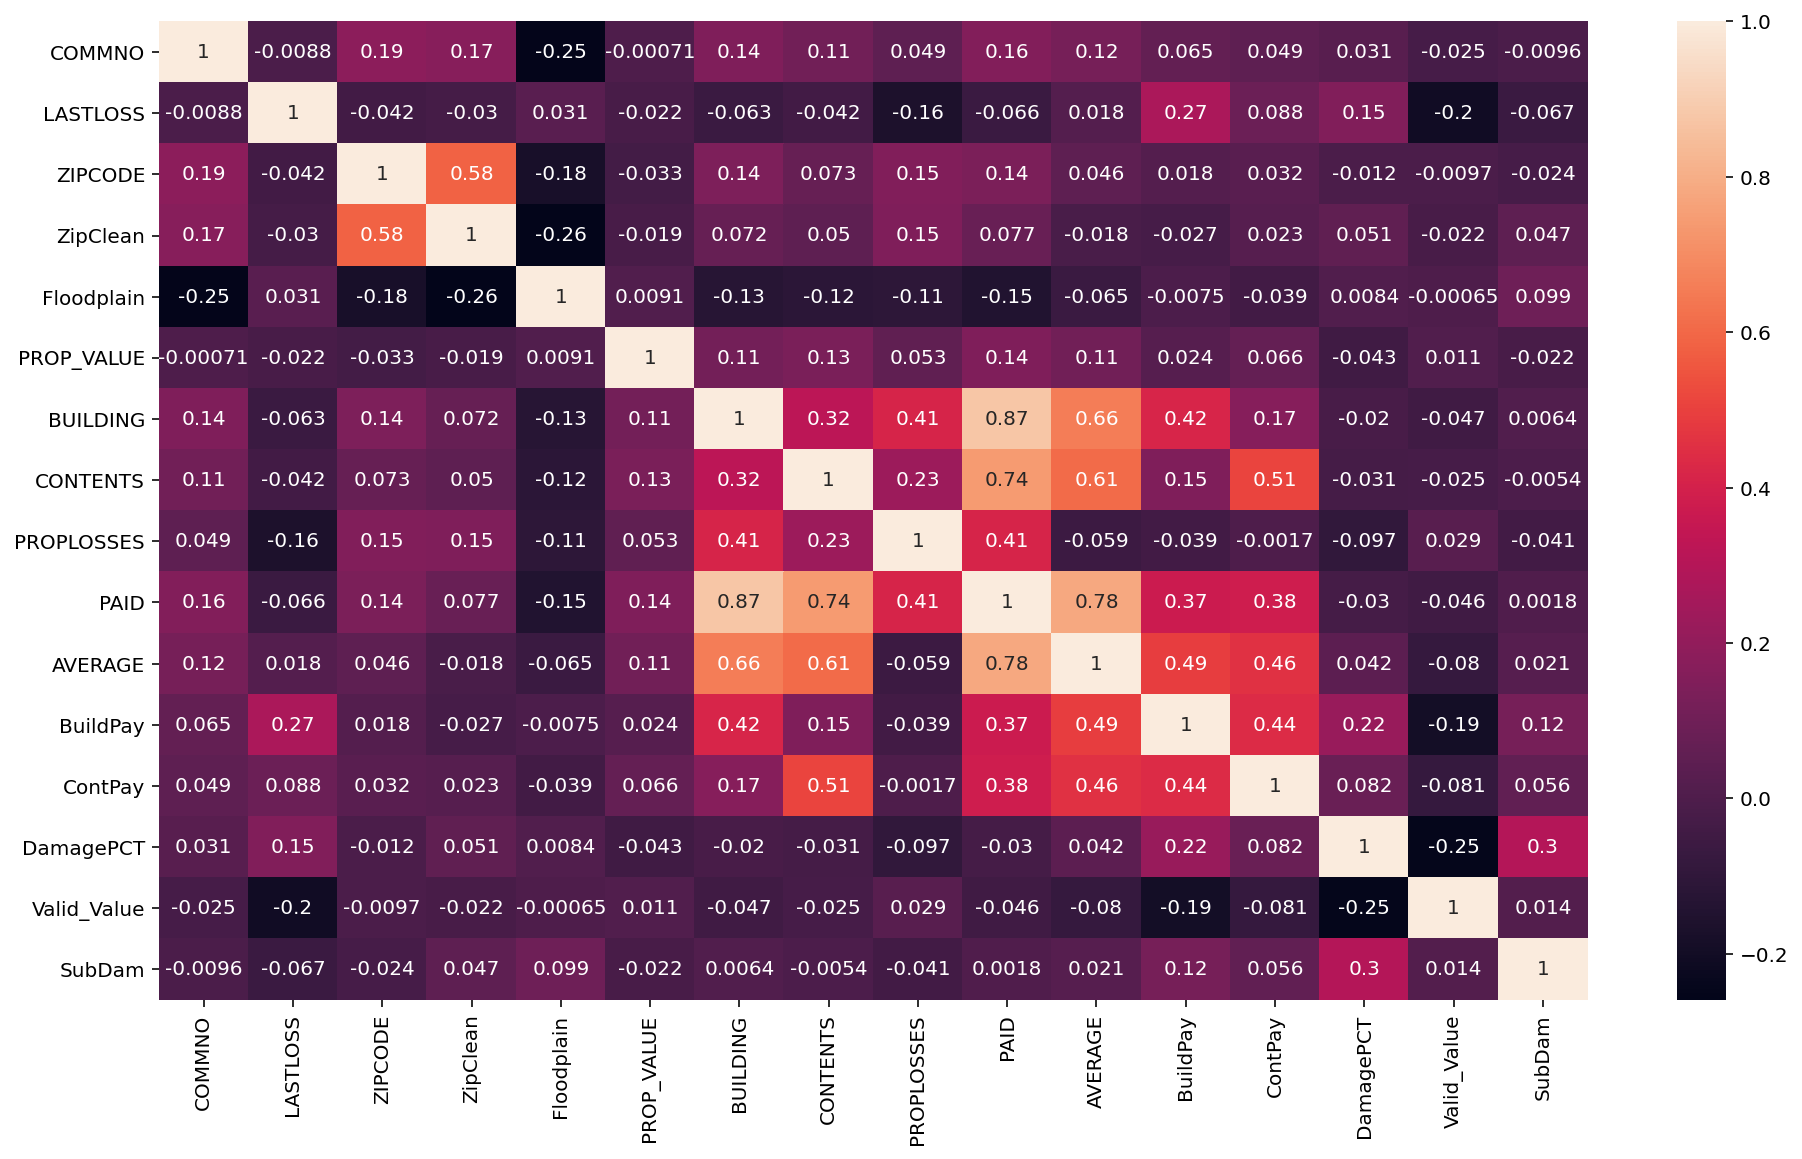

In [ ]:
import seaborn as sns
plt.subplots(figsize=(16,9))
correlation_mat=df2.corr()
sns.heatmap(correlation_mat,annot=True)

In [ ]:
df2['BuildPay']=df2['BuildPay'].fillna((df2['BuildPay'].median()))
df2['ContPay']=df2['ContPay'].fillna((df2['ContPay'].median()))


In [ ]:
pd.isnull(df2).values.any()

False

In [ ]:
df2 = df2.drop(['DTLOSS01'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATENAME      10000 non-null  object 
 1   COMMNO         10000 non-null  int64  
 2   LASTLOSS       10000 non-null  bool   
 3   CITY           10000 non-null  object 
 4   ZIPCODE        10000 non-null  int64  
 5   ZipClean       10000 non-null  int64  
 6   OCCUPANCY      10000 non-null  object 
 7   POST_FIRM      10000 non-null  object 
 8   ZONE           10000 non-null  object 
 9   Floodplain     10000 non-null  bool   
 10  PROP_VALUE     10000 non-null  int64  
 11  BUILDING       10000 non-null  float64
 12  CONTENTS       10000 non-null  float64
 13  PROPLOSSES     10000 non-null  int64  
 14  PAID           10000 non-null  float64
 15  AVERAGE        10000 non-null  float64
 16  AS_OF_DT       10000 non-null  object 
 17  LossDateClean  10000 non-null  object 
 18  BuildPa

In [ ]:
df2 = df2.drop(['COMMNO','ZIPCODE'], axis=1)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATENAME      10000 non-null  object 
 1   LASTLOSS       10000 non-null  bool   
 2   CITY           10000 non-null  object 
 3   ZipClean       10000 non-null  int64  
 4   OCCUPANCY      10000 non-null  object 
 5   POST_FIRM      10000 non-null  object 
 6   ZONE           10000 non-null  object 
 7   Floodplain     10000 non-null  bool   
 8   PROP_VALUE     10000 non-null  int64  
 9   BUILDING       10000 non-null  float64
 10  CONTENTS       10000 non-null  float64
 11  PROPLOSSES     10000 non-null  int64  
 12  PAID           10000 non-null  float64
 13  AVERAGE        10000 non-null  float64
 14  AS_OF_DT       10000 non-null  object 
 15  LossDateClean  10000 non-null  object 
 16  BuildPay       10000 non-null  float64
 17  ContPay        10000 non-null  float64
 18  DamageP

Continuous: 11 features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65893ab940>,
      dtype=object)

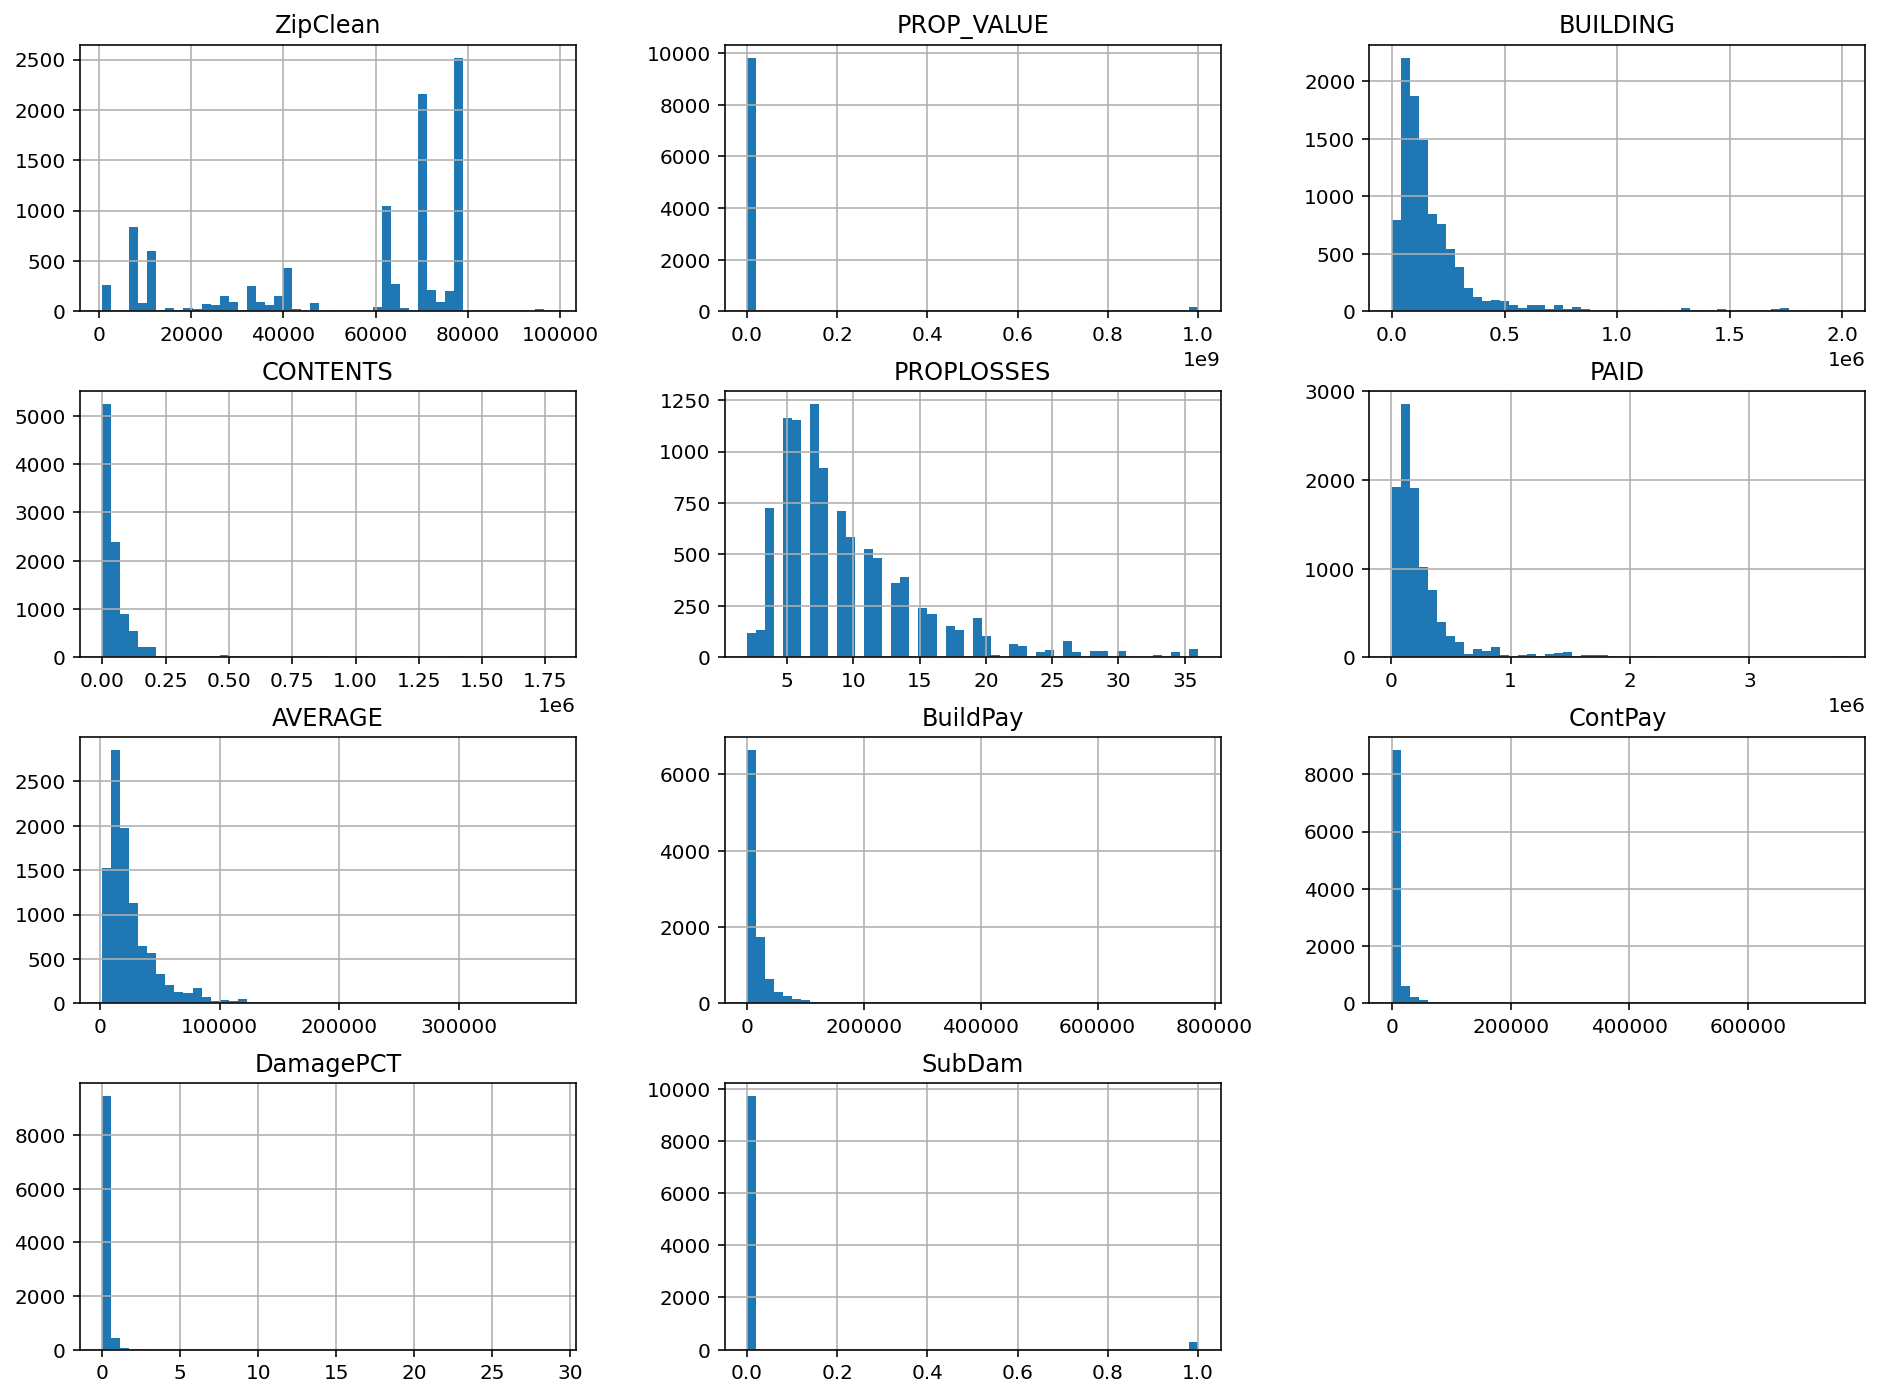

In [ ]:
cont_features = [cont for cont in list(df2.select_dtypes(
                 include=['float64', 'int64']).columns)]
print("Continuous: {} features".format(len(cont_features)))
df2[cont_features].hist(bins=50, figsize=(16,12))


In [ ]:
df2.skew(axis = 0, skipna = True) 


LASTLOSS        2.125319
ZipClean       -0.857731
Floodplain     -1.133465
PROP_VALUE      7.566800
BUILDING        4.354275
CONTENTS        5.704499
PROPLOSSES      1.730644
PAID            4.029712
AVERAGE         4.651016
BuildPay        6.283986
ContPay        12.453451
DamagePCT      30.089686
Valid_Value   -12.381536
SubDam          5.745409
dtype: float64

In [ ]:

import numpy as np
from numpy import float64, int64
def log(x):
       if isinstance(x, np.float64) or isinstance(x, np.int64):
              apply(np.log(x+1))
       else:
              return x

df2.apply(log)


,STATENAME,LASTLOSS,CITY,ZipClean,OCCUPANCY,POST_FIRM,ZONE,Floodplain,PROP_VALUE,BUILDING,CONTENTS,PROPLOSSES,PAID,AVERAGE,AS_OF_DT,LossDateClean,BuildPay,ContPay,DamagePCT,Valid_Value,SubDam
0,TEXAS,False,SAN ANTONIO,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,04-04-1991,9075.87,1829.27,0.000000,True,0
1,TEXAS,False,SAN ANTONIO,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,05-05-1993,47806.35,26351.50,0.068674,True,0
2,TEXAS,False,SAN ANTONIO,78216,SINGLE FMLY,N,AE,True,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,17-10-1998,53425.24,40092.22,0.076745,True,0
3,TEXAS,True,SAN ANTONIO,78216,SINGLE FMLY,N,X,False,696139,171697.00,108537.57,4,280234.57,70058.64,01/31/2018,01-07-2002,38355.19,3569.51,0.055097,True,0
4,RHODE ISLAND,False,SOUTH KINGSTON,2879,SINGLE FMLY,N,VE,True,80442,100785.43,0.00,5,100785.43,20157.09,01/31/2018,19-08-1991,11808.00,0.00,0.146789,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEXAS,False,BEAUMONT,77707,1,Y,X,False,144000,56196.62,45361.53,5,101558.15,20311.63,20151130,11-06-1987,12023.13,9561.59,0.083494,True,0
9996,TEXAS,False,BEAUMONT,77707,1,Y,X,False,144000,56196.62,45361.53,5,101558.15,20311.63,20151130,27-06-1989,7165.37,5000.00,0.049760,True,0
9997,TEXAS,False,BEAUMONT,77707,1,Y,X,False,144000,56196.62,45361.53,5,101558.15,20311.63,20151130,17-10-1994,5957.62,5498.89,0.041372,True,0
9998,TEXAS,False,BEAUMONT,77707,1,Y,X,False,144000,56196.62,45361.53,5,101558.15,20311.63,20151130,06-06-2001,28194.07,25000.00,0.195792,True,0


In [ ]:
df2.skew(axis = 0, skipna = True) 


LASTLOSS        2.125319
ZipClean       -0.857731
Floodplain     -1.133465
PROP_VALUE      7.566800
BUILDING        4.354275
CONTENTS        5.704499
PROPLOSSES      1.730644
PAID            4.029712
AVERAGE         4.651016
BuildPay        6.283986
ContPay        12.453451
DamagePCT      30.089686
Valid_Value   -12.381536
SubDam          5.745409
dtype: float64

In [ ]:
cont_features = [cont for cont in list(df2.select_dtypes(
                 include=['float64', 'int64']).columns)]
print("Continuous features : ",cont_features)


Continuous features :  ['ZipClean', 'PROP_VALUE', 'BUILDING', 'CONTENTS', 'PROPLOSSES', 'PAID', 'AVERAGE', 'BuildPay', 'ContPay', 'DamagePCT', 'SubDam']


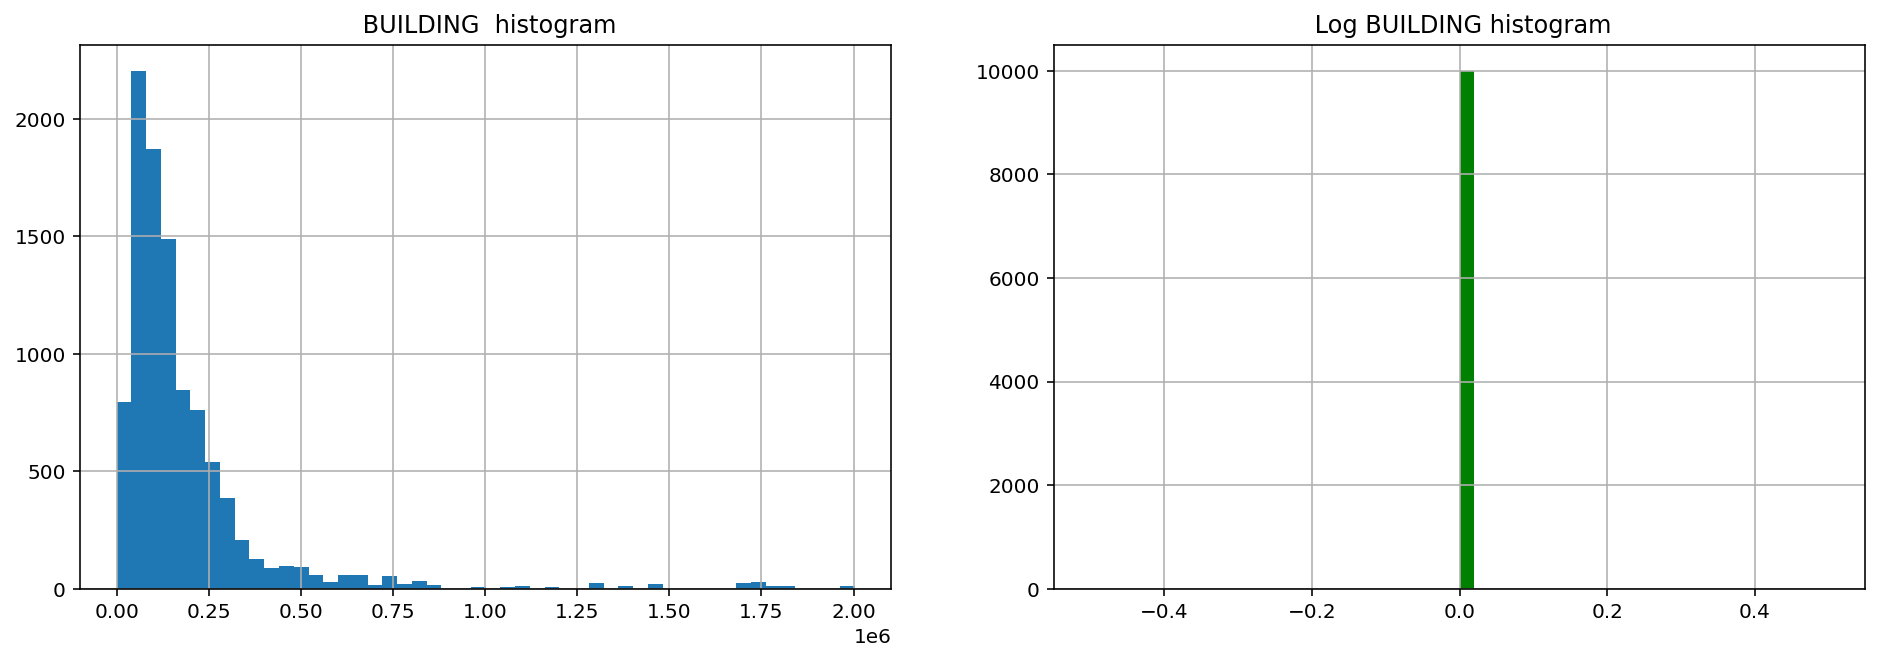

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(df2['BUILDING'], bins=50)
ax1.set_title(' BUILDING  histogram')
ax1.grid(True)
#ax2.hist(np.log(df2['BUILDING']), bins=50, color='g')
ax2.hist(np.log(np.isfinite(df2['BUILDING'])), bins=50, color='g')
ax2.set_title(' Log BUILDING histogram')
ax2.grid(True)
plt.show()

In [ ]:
build=np.log(df2['BUILDING'])
build.skew()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

In [ ]:
df2['BUILDING'].skew(skipna='true')

4.354275346504546

In [ ]:
cont=pd.DataFrame(cont_features)

In [ ]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11 non-null     object
dtypes: object(1)
memory usage: 216.0+ bytes


In [ ]:
df2=df2.drop(['AS_OF_DT'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATENAME      10000 non-null  object 
 1   LASTLOSS       10000 non-null  bool   
 2   CITY           10000 non-null  object 
 3   ZipClean       10000 non-null  int64  
 4   OCCUPANCY      10000 non-null  object 
 5   POST_FIRM      10000 non-null  object 
 6   ZONE           10000 non-null  object 
 7   Floodplain     10000 non-null  bool   
 8   PROP_VALUE     10000 non-null  int64  
 9   BUILDING       10000 non-null  float64
 10  CONTENTS       10000 non-null  float64
 11  PROPLOSSES     10000 non-null  int64  
 12  PAID           10000 non-null  float64
 13  AVERAGE        10000 non-null  float64
 14  LossDateClean  10000 non-null  object 
 15  BuildPay       10000 non-null  float64
 16  ContPay        10000 non-null  float64
 17  DamagePCT      10000 non-null  float64
 18  Valid_V

In [ ]:
import collections

cat_features = list(df2.select_dtypes(include=['object']).columns)
print("categorical values: {}".format(len(cat_features)))

cat_uniques = []
for cat in cat_features:
    cat_uniques.append(len(df2[cat].unique()))

uv = pd.DataFrame.from_dict(collections.OrderedDict([('cat_names', cat_features), ('unique_values', cat_uniques)]))
uv


categorical values: 6


,cat_names,unique_values
0,STATENAME,31
1,CITY,391
2,OCCUPANCY,12
3,POST_FIRM,3
4,ZONE,53
5,LossDateClean,2386


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

df2["STATENAME code"] = lb_make.fit_transform(df2["STATENAME"])
df2.append(df2["STATENAME code"])
df2["CITY code"] = lb_make.fit_transform(df2["CITY"])
df2.append(df2["CITY code"])
df2["OCCUPANCY code"] = lb_make.fit_transform(df2["OCCUPANCY"])
df2.append(df2["OCCUPANCY code"])
df2["ZONE code"] = lb_make.fit_transform(df2["ZONE"])
df2.append(df2["ZONE code"])



,STATENAME,LASTLOSS,CITY,ZipClean,OCCUPANCY,POST_FIRM,ZONE,Floodplain,PROP_VALUE,BUILDING,CONTENTS,PROPLOSSES,PAID,AVERAGE,LossDateClean,BuildPay,ContPay,DamagePCT,Valid_Value,SubDam,STATENAME code,CITY code,OCCUPANCY code,ZONE code,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,TEXAS,0.0,SAN ANTONIO,78216.0,SINGLE FMLY,N,AE,1.0,696139.0,171697.00,108537.57,4.0,280234.57,70058.64,04-04-1991,9075.87,1829.27,0.000000,1.0,0.0,27.0,304.0,10.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TEXAS,0.0,SAN ANTONIO,78216.0,SINGLE FMLY,N,AE,1.0,696139.0,171697.00,108537.57,4.0,280234.57,70058.64,05-05-1993,47806.35,26351.50,0.068674,1.0,0.0,27.0,304.0,10.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TEXAS,0.0,SAN ANTONIO,78216.0,SINGLE FMLY,N,AE,1.0,696139.0,171697.00,108537.57,4.0,280234.57,70058.64,17-10-1998,53425.24,40092.22,0.076745,1.0,0.0,27.0,304.0,10.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TEXAS,1.0,SAN ANTONIO,78216.0,SINGLE FMLY,N,X,0.0,696139.0,171697.00,108537.57,4.0,280234.57,70058.64,01-07-2002,38355.19,3569.51,0.055097,1.0,0.0,27.0,304.0,10.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RHODE ISLAND,0.0,SOUTH KINGSTON,2879.0,SINGLE FMLY,N,VE,1.0,80442.0,100785.43,0.00,5.0,100785.43,20157.09,19-08-1991,11808.00,0.00,0.146789,1.0,0.0,24.0,326.0,10.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,TEXAS,0.0,BEAUMONT,77707.0,1,Y,X,0.0,144000.0,56196.62,45361.53,5.0,101558.15,20311.63,27-06-1989,7165.37,5000.00,0.049760,1.0,0.0,27.0,25.0,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,TEXAS,0.0,BEAUMONT,77707.0,1,Y,X,0.0,144000.0,56196.62,45361.53,5.0,101558.15,20311.63,17-10-1994,5957.62,5498.89,0.041372,1.0,0.0,27.0,25.0,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,TEXAS,0.0,BEAUMONT,77707.0,1,Y,X,0.0,144000.0,56196.62,45361.53,5.0,101558.15,20311.63,06-06-2001,28194.07,25000.00,0.195792,1.0,0.0,27.0,25.0,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,TEXAS,1.0,BEAUMONT,77707.0,1,Y,X,0.0,144000.0,

In [ ]:
df2['ZONE'].value_counts()

A      3729
X      1807
AE     1576
C       463
V       222
A06     192
A05     174
EMG     169
VE      167
B       166
A03     149
A08     124
         86
A04      85
A10      80
A07      74
O        71
A01      68
A12      59
A15      53
A21      49
A14      45
A13      43
A17      39
A02      30
AO       29
V10      27
A09      26
A20      22
A11      21
V12      16
D        13
V15      13
A00      11
A23      11
V13      10
A18       9
V08       9
A99       8
V09       8
V21       7
V04       6
E         5
V16       5
V14       5
V03       4
A22       4
V18       3
V06       3
A0B       2
V11       1
V02       1
AOB       1
Name: ZONE, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATENAME       10000 non-null  object 
 1   LASTLOSS        10000 non-null  bool   
 2   CITY            10000 non-null  object 
 3   ZipClean        10000 non-null  int64  
 4   OCCUPANCY       10000 non-null  object 
 5   POST_FIRM       10000 non-null  object 
 6   ZONE            10000 non-null  object 
 7   Floodplain      10000 non-null  bool   
 8   PROP_VALUE      10000 non-null  int64  
 9   BUILDING        10000 non-null  float64
 10  CONTENTS        10000 non-null  float64
 11  PROPLOSSES      10000 non-null  int64  
 12  PAID            10000 non-null  float64
 13  AVERAGE         10000 non-null  float64
 14  LossDateClean   10000 non-null  object 
 15  BuildPay        10000 non-null  float64
 16  ContPay         10000 non-null  float64
 17  DamagePCT       10000 non-null  

In [ ]:
df2=df2.drop(['ZONE','ZONE code'],axis=1)


In [ ]:
df2=df2.drop(['STATENAME','CITY','OCCUPANCY'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(df2["POST_FIRM"])
lb_results

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [ ]:
df2 = pd.get_dummies(data=df2, columns=["POST_FIRM"])


In [ ]:
def f(x):
  dfd=x.copy()
  dfd['year']=pd.DatetimeIndex(x['LossDateClean']).year
  dfd['month']=pd.DatetimeIndex(x['LossDateClean']).month
  dfd['day']=pd.DatetimeIndex(x['LossDateClean']).day
  return dfd
df2=f(df2)
import datetime
years = df2['year']
months = df2['month']
days = df2['day']

dates = [str(int(year1)) + '-' + str(int(month1)) + '-' + str(int(day1)) for year1, month1, day1 in zip(years, months,days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
dates.sort()
print(dates)

[datetime.datetime(1978, 1, 24, 0, 0), datetime.datetime(1978, 1, 25, 0, 0), datetime.datetime(1978, 1, 26, 0, 0), datetime.datetime(1978, 1, 26, 0, 0), datetime.datetime(1978, 1, 26, 0, 0), datetime.datetime(1978, 1, 31, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0, 0), datetime.datetime(1978, 3, 5, 0

In [ ]:
df2=df2.drop(['LossDateClean'],axis=1)

In [ ]:
label=np.array(df2['PAID'])
features=df2.drop(['PAID'],axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LASTLOSS        10000 non-null  bool   
 1   ZipClean        10000 non-null  int64  
 2   Floodplain      10000 non-null  bool   
 3   PROP_VALUE      10000 non-null  int64  
 4   BUILDING        10000 non-null  float64
 5   CONTENTS        10000 non-null  float64
 6   PROPLOSSES      10000 non-null  int64  
 7   AVERAGE         10000 non-null  float64
 8   BuildPay        10000 non-null  float64
 9   ContPay         10000 non-null  float64
 10  DamagePCT       10000 non-null  float64
 11  Valid_Value     10000 non-null  bool   
 12  SubDam          10000 non-null  int64  
 13  STATENAME code  10000 non-null  int64  
 14  CITY code       10000 non-null  int64  
 15  OCCUPANCY code  10000 non-null  int64  
 16  POST_FIRM_      10000 non-null  uint8  
 17  POST_FIRM_N     10000 non-null  

In [ ]:
import sklearn.model_selection as model_selection
train_features,test_features,train_labels,test_labels=model_selection.train_test_split(features,label,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import mean_absolute_error
#from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
lr=linear_model.LinearRegression()

In [ ]:
model1=lr.fit(train_features,train_labels)
prediction=lr.predict(test_features)
print('Prediction : ',prediction)
errors=abs(prediction-test_labels)
print('Error : ',errors)
print('Mean Absolute Error : ',round(np.mean(errors),2))
mape=100*(errors/test_labels)
print('MAPE : ',mape)
#accuracy=100-np.mean(mape)
#print('Accuracy : ',round(accuracy,2))
accuracy=model1.score(test_features, test_labels)
 
print('Accuracy: ' ,accuracy*100,'%')

print('score : ', model1.score(test_features,test_labels))

Prediction :  [122947.15 175332.89 512749.07 ... 158702.53 162391.52 171320.93]
Error :  [1.45519152e-11 8.73114914e-11 4.65661287e-10 ... 5.82076609e-11
 8.73114914e-11 8.73114914e-11]
Mean Absolute Error :  0.0
MAPE :  [1.18359110e-14 4.97975545e-14 9.08166030e-14 ... 3.66772104e-14
 5.37660411e-14 5.09637038e-14]
Accuracy:  100.0 %
score :  1.0


In [ ]:
test_labels

array([122947.15, 175332.89, 512749.07, ..., 158702.53, 162391.52,
       171320.93])

<function matplotlib.pyplot.show>

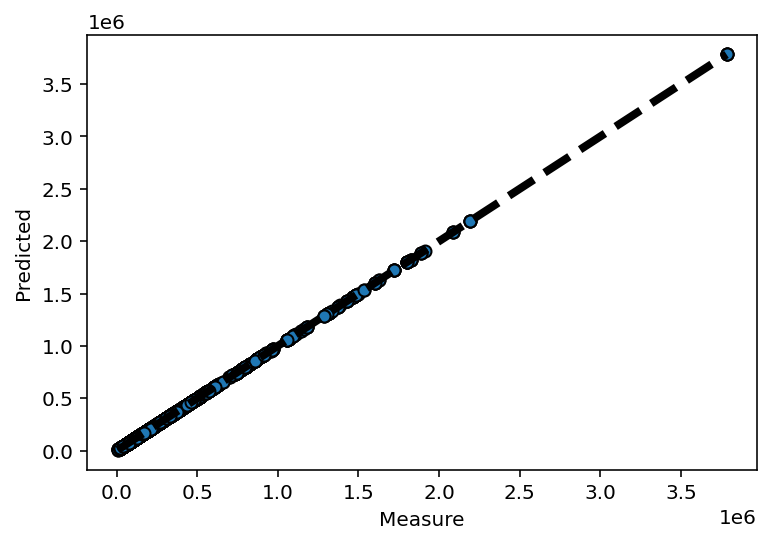

In [ ]:
fig,ax=plt.subplots()
ax.scatter(test_labels,prediction,edgecolors=(0,0,0))
ax.plot([test_labels.min(),test_labels.max()],[test_labels.min(),test_labels.max()],'k--',lw=4)
ax.set_xlabel('Measure')
ax.set_ylabel('Predicted')
plt.show